In [ ]:
import pandas as pd
import glob
from collections import defaultdict
from datetime import datetime
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plot_dir = "../plots"

if not os.path.exists("../plots"):
  os.mkdir("../plots")

data_dir = "../data/curated"


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


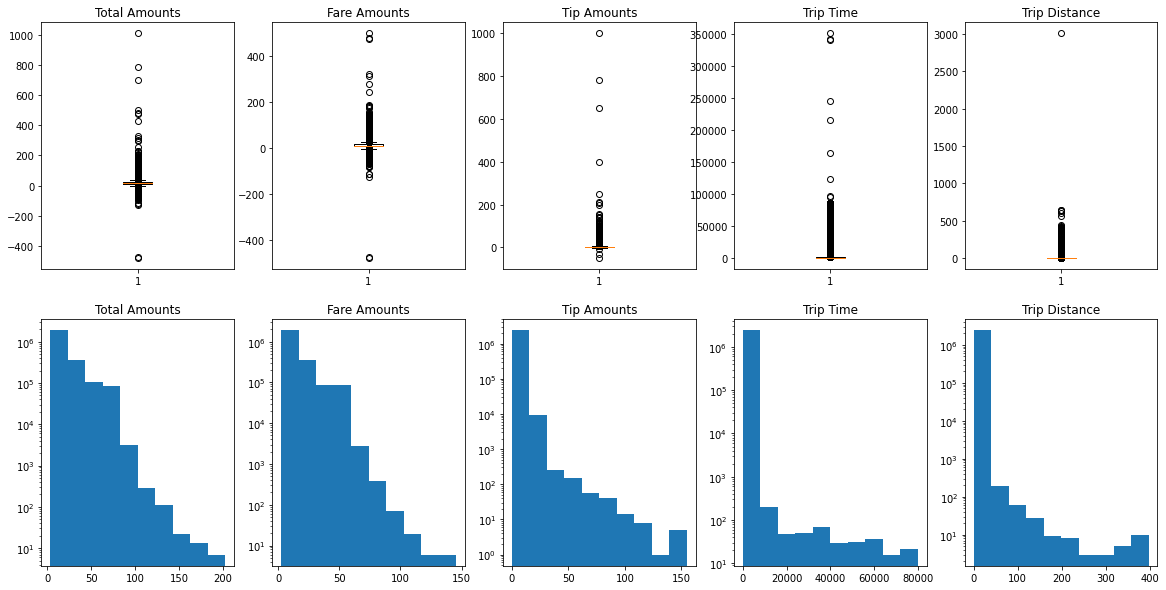

In [ ]:
df = pd.read_csv(f"{data_dir}/yellow_tripdata_2021-11.csv", parse_dates = ["tpep_pickup_datetime", "tpep_dropoff_datetime"])
df = df[(df.PULocationID<=263) & (df.DOLocationID<=263)]
df['trip_time'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.total_seconds()
f, axes = plt.subplots(2,5, figsize = (20,10))
axes[0][0].boxplot(df.total_amount)
axes[0][0].set_title('Total Amounts')
axes[0][1].boxplot(df.fare_amount)
axes[0][1].set_title('Fare Amounts')
axes[0][2].boxplot(df.tip_amount)
axes[0][2].set_title('Tip Amounts')
axes[0][3].boxplot(df.trip_time)
axes[0][3].set_title('Trip Time')
axes[0][4].boxplot(df.trip_distance)
axes[0][4].set_title('Trip Distance')

df = df[(df.total_amount<250) & (df.total_amount > 0) & (df.fare_amount<180) & (df.fare_amount > 0) & (df.tip_amount<180) & (df.tip_amount > 0) & (df.trip_time < 80000) & (df.trip_time > 0) & (df.trip_distance < 400)]

axes[1][0].hist(df.total_amount)
axes[1][0].set_title('Total Amounts')
axes[1][0].set_yscale('log')
axes[1][1].hist(df.fare_amount)
axes[1][1].set_title('Fare Amounts')
axes[1][1].set_yscale('log')
axes[1][2].hist(df.tip_amount)
axes[1][2].set_title('Tip Amounts')
axes[1][2].set_yscale('log')
axes[1][3].hist(df.trip_time)
axes[1][3].set_title('Trip Time')
axes[1][3].set_yscale('log')
axes[1][4].hist(df.trip_distance)
axes[1][4].set_title('Trip Distance')
axes[1][4].set_yscale('log')
plt.savefig(f"{plot_dir}/explore_yellow.png", bbox_inches='tight')

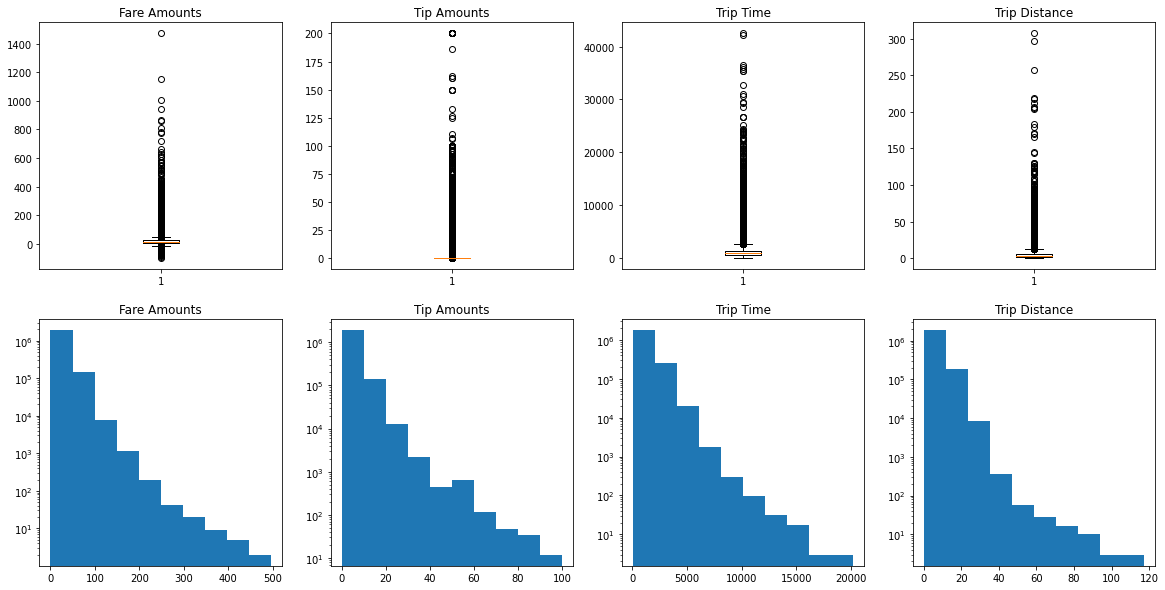

In [ ]:
df = pd.read_csv(f"{data_dir}/fhvhv_tripdata_2021-11.csv")
df = df[(df.PULocationID<=263) & (df.DOLocationID<=263)]

f, axes = plt.subplots(2,4, figsize = (20,10))
axes[0][0].boxplot(df.base_passenger_fare)
axes[0][0].set_title('Fare Amounts')
axes[0][1].boxplot(df.tips)
axes[0][1].set_title('Tip Amounts')
axes[0][2].boxplot(df.trip_time)
axes[0][2].set_title('Trip Time')
axes[0][3].boxplot(df.trip_miles)
axes[0][3].set_title('Trip Distance')


df = df[(df.base_passenger_fare < 600) & (df.base_passenger_fare > 0) & (df.tips < 100) & (df.tips > 0) & (df.trip_time < 25000) & (df.trip_time > 0) & (df.trip_miles < 120) & (df.trip_miles > 0)]

axes[1][0].hist(df.base_passenger_fare)
axes[1][0].set_title('Fare Amounts')
axes[1][0].set_yscale('log')

axes[1][1].hist(df.tips)
axes[1][1].set_title('Tip Amounts')
axes[1][1].set_yscale('log')

axes[1][2].hist(df.trip_time)
axes[1][2].set_title('Trip Time')
axes[1][2].set_yscale('log')

axes[1][3].hist(df.trip_miles)
axes[1][3].set_title('Trip Distance')
axes[1][3].set_yscale('log')

plt.savefig(f"{plot_dir}/explore_fhvhv.png", bbox_inches='tight')